# Drive Share Example Analysis

This is an outline for a combined documentation / example anaylsis of the [driveshare.me](http://driveshare.me) project by Eric Hong.

## Downloading the Data

Anonymized path data can be obtained as a json file and high level data as a csv file from [driveshare](http://driveshare.me). 
Click `anonymized paths` or `high level data` in the bottom right.

Examples of how to use the data are shown below.

## Loading Data Directly into Julia

In [1]:
using DriveShare
anon_paths = get_dataset(:trace) # Anonymized paths now loaded.
typeof(anon_paths)

Array{Any,1}

Total distance calculated is less than what is shown on driveshare.me
because `get_dataset(:trace)` only returns trip objects that contain paths.
As explained in the [api-reference](https://developer.automatic.com/api-reference/): 
"In cases where no GPS signal was available during the trip, path may be returned as null."

![Ma Image](json.png)

Here we extract the total duration and distance of all trips.

In [2]:
total_duration_s = 0
total_distance_m = 0
for path_data in anon_paths
    total_duration_s += path_data["duration_s"]
    total_distance_m += path_data["distance_m"]
end
@printf("total duration (seconds): %15.3f\n", total_duration_s)
@printf("total distance (meters)): %15.3f\n", total_distance_m)

total duration (seconds):     2550161.100
total distance (meters)):    31549037.400


The High Level dataset is loaded the same way, but returns a `DataFrame`.

In [3]:
high_level = get_dataset(:highlevel) # DataFrame
names(high_level)

39-element Array{Symbol,1}:
 :trip_ID              
 :vehicle_ID           
 :start_time           
 :end_time             
 :distance_m           
 :duration_s           
 :fuel_cost            
 :fuel_volume          
 :average_kmpl         
 :average_from_epa_kmpl
 :score_events         
 :score_speeding       
 :hard_brakes          
 ⋮                     
 :battery_voltage      
 :active_dtcs          
 :start_city           
 :start_state          
 :start_country        
 :end_city             
 :end_state            
 :end_country          
 :start_lat            
 :start_long           
 :end_lat              
 :end_long             

In [4]:
using CrossfilterCharts
using DataFrames
df = DataFrame()
for sym in [:make, :model, :distance_m, :average_kmpl, :score_speeding, 
            :hard_brakes, :city_fraction, :highway_fraction]
    df[sym] = high_level[sym]
end

dc(df)

CrossfilterCharts.DCOut(2820×8 DataFrames.DataFrame
│ Row  │ make     │ model          │ distance_m │ average_kmpl │
├──────┼──────────┼────────────────┼────────────┼──────────────┤
│ 1    │ "Subaru" │ "Outback"      │ 13.6       │ 1.5          │
│ 2    │ "Subaru" │ "Outback"      │ 2002.2     │ 7.9          │
│ 3    │ "Subaru" │ "Outback"      │ 117.9      │ 3.2          │
│ 4    │ "Subaru" │ "Outback"      │ 224.7      │ 3.8          │
│ 5    │ "Subaru" │ "Outback"      │ 46572.0    │ 9.7          │
│ 6    │ "Subaru" │ "Outback"      │ 47357.4    │ 23.2         │
│ 7    │ "Subaru" │ "Outback"      │ 2293.3     │ 8.8          │
│ 8    │ "Subaru" │ "Outback"      │ 172.9      │ 5.7          │
│ 9    │ "Subaru" │ "Outback"      │ 18207.4    │ 9.8          │
│ 10   │ "Subaru" │ "Outback"      │ 23055.8    │ 11.9         │
│ 11   │ "Subaru" │ "Outback"      │ 14007.9    │ 15.5         │
⋮
│ 2809 │ "Toyota" │ "Sienna"       │ 3206.7     │ 6.7          │
│ 2810 │ "Toyota" │ "Sienna"       │ 3231.6     │ 8.0          │
│ 2811 │ "Subaru" │ "Outback"      │ 2561.1     │ 9.1          │
│ 2812 │ "Subaru" │ "Outback"      │ 2302.5     │ 7.5          │
│ 2813 │ "Subaru" │ "Outback"      │ 2702.4     │ 10.4         │
│ 2814 │ "Subaru" │ "Outback"      │ 1852.8     │ 6.6          │
│ 2815 │ "Subaru" │ "Outback"      │ 17037.2    │ 10.2         │
│ 2816 │ "Subaru" │ "Outback"      │ 2149.2     │ 7.9          │
│ 2817 │ "Subaru" │ "Outback"      │ 796.4      │ 6.6          │
│ 2818 │ "Subaru" │ "Legacy Wagon" │ 6945.2     │ 7.4          │
│ 2819 │ "Subaru" │ "Outback"      │ 2399.2     │ 8.1          │
│ 2820 │ "Subaru" │ "Outback"      │ 63535.5    │ 11.2         │

│ Row  │ score_speeding │ hard_brakes │ city_fraction │ highway_fraction │
├──────┼────────────────┼─────────────┼───────────────┼──────────────────┤
│ 1    │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 2    │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 3    │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 4    │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 5    │ -15.25         │ 1           │ 0.64          │ 0.36             │
│ 6    │ 50.0           │ 0           │ 0.77          │ 0.23             │
│ 7    │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 8    │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 9    │ 49.1           │ 1           │ 0.93          │ 0.07             │
│ 10   │ 35.12          │ 1           │ 0.82          │ 0.18             │
│ 11   │ 34.41          │ 0           │ 0.31          │ 0.69             │
⋮
│ 2809 │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 2810 │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 2811 │ 50.0           │ 1           │ 1.0           │ 0.0              │
│ 2812 │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 2813 │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 2814 │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 2815 │ 50.0           │ 0           │ 0.94          │ 0.06             │
│ 2816 │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 2817 │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 2818 │ 50.0           │ 1           │ 0.94          │ 0.06             │
│ 2819 │ 50.0           │ 0           │ 1.0           │ 0.0              │
│ 2820 │ 49.01          │ 0           │ 0.65          │ 0.35             │,CrossfilterCharts.Dimension[CrossfilterCharts.Dimension(:make,"function(d){return d.make; }",NaN),CrossfilterCharts.Dimension(:model,"function(d){return d.model; }",NaN),CrossfilterCharts.Dimension(:distance_m,"function(d){return Math.round(d.distance_m / 50000.000000)*50000.000000; }",50000.0),CrossfilterCharts.Dimension(:average_kmpl,"function(d){return Math.round(d.average_kmpl / 1.000000)*1.000000; }",1.0),CrossfilterCharts.Dimension(:

## Basic Data Analysis

In [5]:
@printf("%-50s %10d\n", "number of trips:", size(high_level, 1))
@printf("%-50s %10d\n", "number of unique vehicles:", length(unique(high_level[:vehicle_ID])))
@printf("%-50s %14.3f\n", "total duration [sec]", sum(high_level[:duration_s]))
@printf("%-50s %14.3f\n", "total distance [m]", sum(high_level[:distance_m]))
@printf("%-50s %10d\n", "number of unique vehicle models:", length(unique(high_level[:model])))

number of trips:                                         2820
number of unique vehicles:                                  5
total duration [sec]                                  2559004.100
total distance [m]                                   31619502.600
number of unique vehicle models:                            4


## Number of Trips per Vehicle


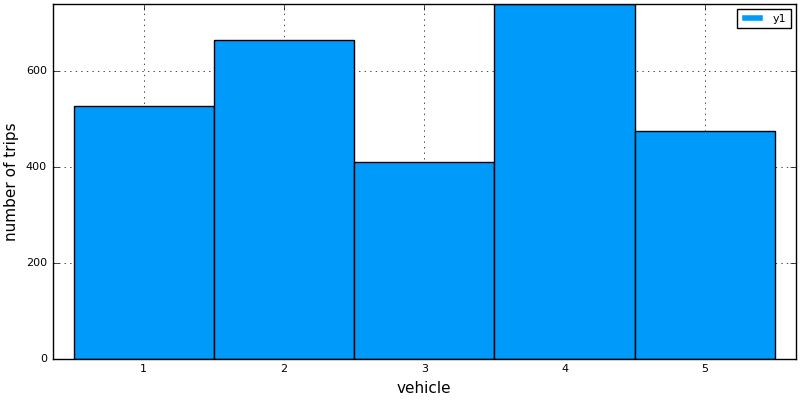

In [6]:
include("plot_helper.jl")
plot_number_of_trips_per_vehicle(high_level)

## Trip Distance per Vehicle


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))



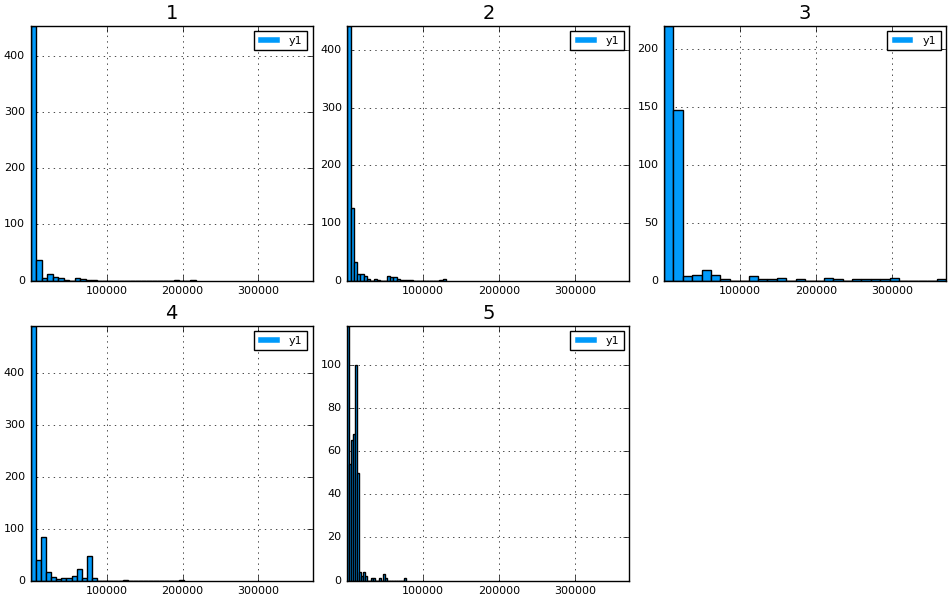

In [7]:
plot_histogram_per_vehcile(high_level, :distance_m)

## Fuel Cost Histogram per Vehicle 


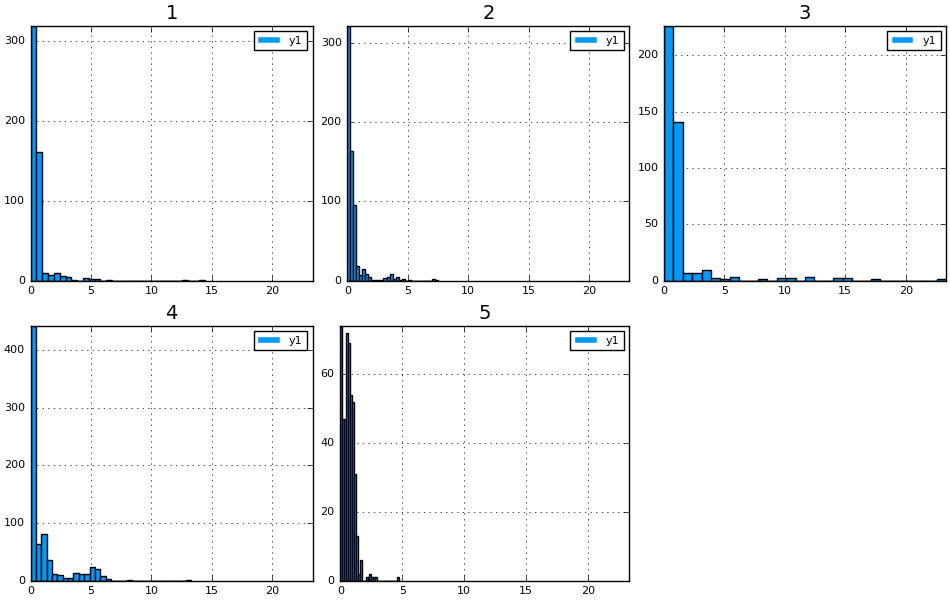

In [8]:
plot_histogram_per_vehcile(high_level, :fuel_cost)

## Hard Accelerations per Vehicle


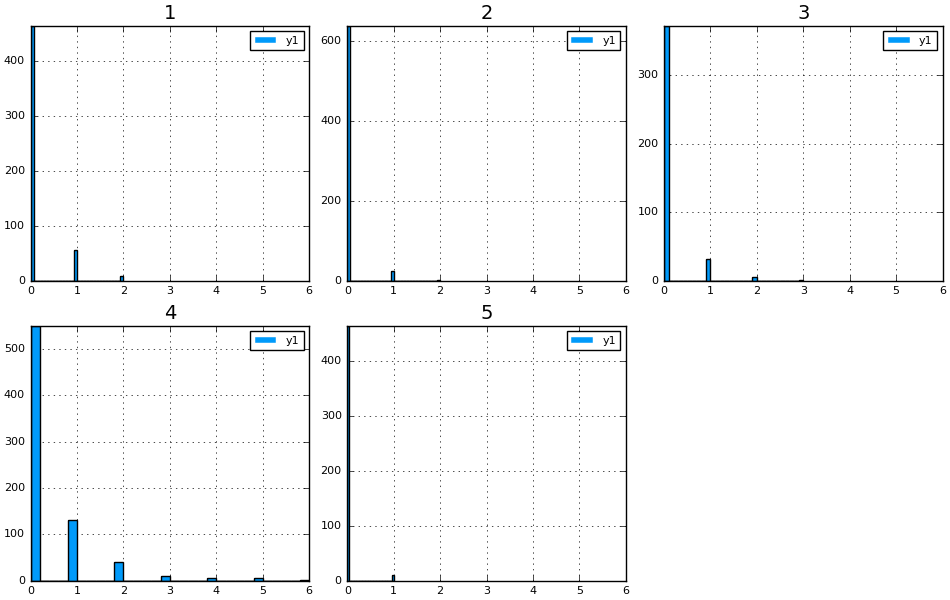

In [9]:
plot_histogram_per_vehcile(high_level, :hard_accels)

## Hard Brakes per Vehicle


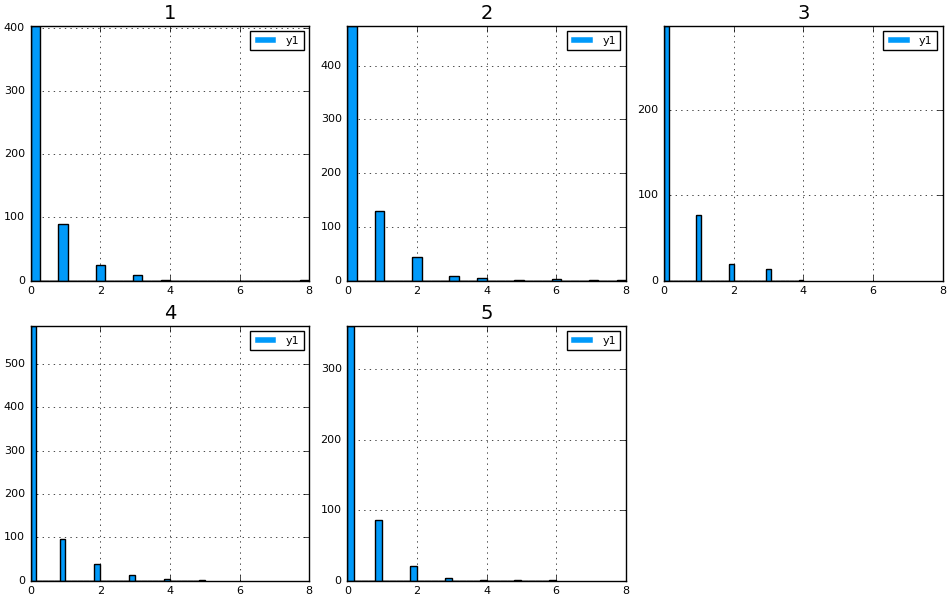

In [10]:
plot_histogram_per_vehcile(high_level, :hard_brakes)

## Speeding Score per Vehicle

"driving score for speeding"


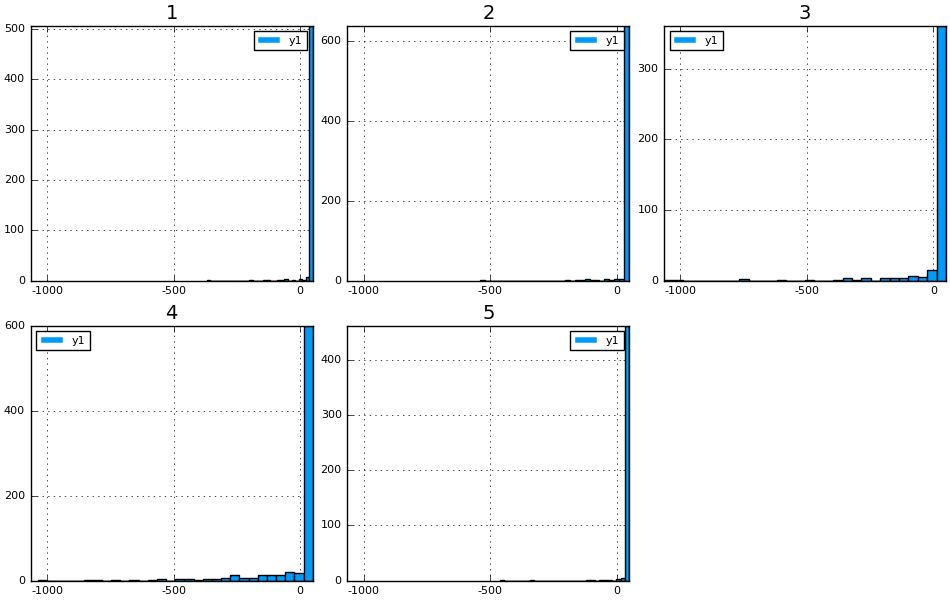

In [11]:
plot_histogram_per_vehcile(high_level, :score_speeding)

## Vehicle Comparison


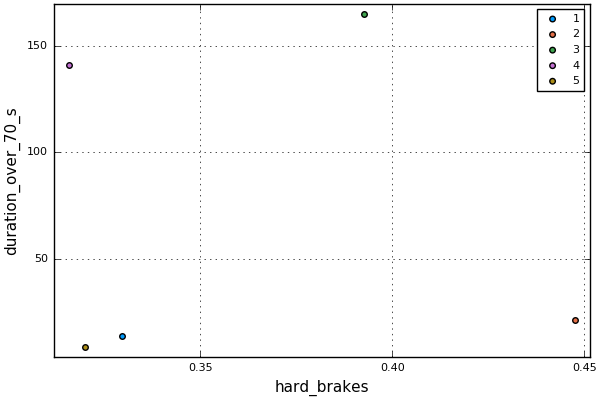

In [12]:
targets = [:distance_m, :duration_s, :average_kmpl, :score_speeding,  :hard_brakes, :city_fraction, :highway_fraction,
    :duration_over_70_s, :duration_over_75_s, :duration_over_80_s, :idling_time_s]
targetA = targets[5]
targetB = targets[8]
scatter_targets(high_level, targetA, targetB)

## Path Data

Here we create a histogram of separation distances between GPS points over all trips.


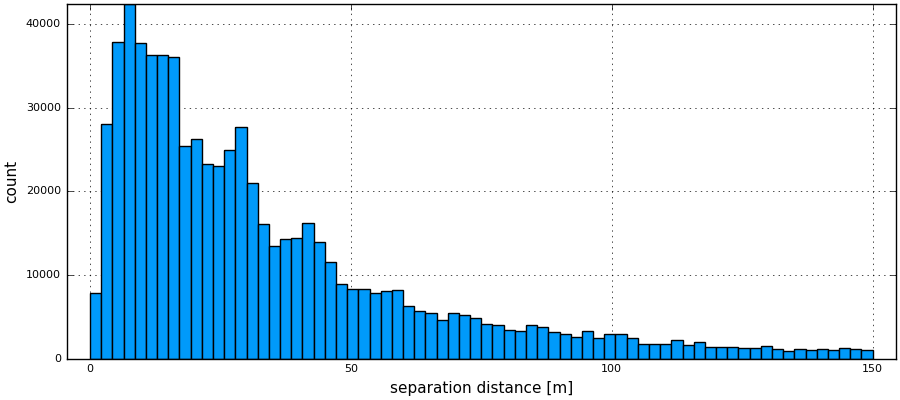

In [13]:
separation_distances = []
for path_data in anon_paths
    for i = 1:length(path_data["utm"])-1
        d = norm(path_data["utm"][i] - path_data["utm"][i+1])
        push!(separation_distances, d)
    end
end
histogram(filter(x->x < 150, separation_distances), nbins=70, xlabel="separation distance [m]", ylabel="count", size=(900,400), leg=false)

Here we create a histogram of (separation distance) / (mean trip velocity), an approximation of the time passed between each point, between GPS points over all trips.


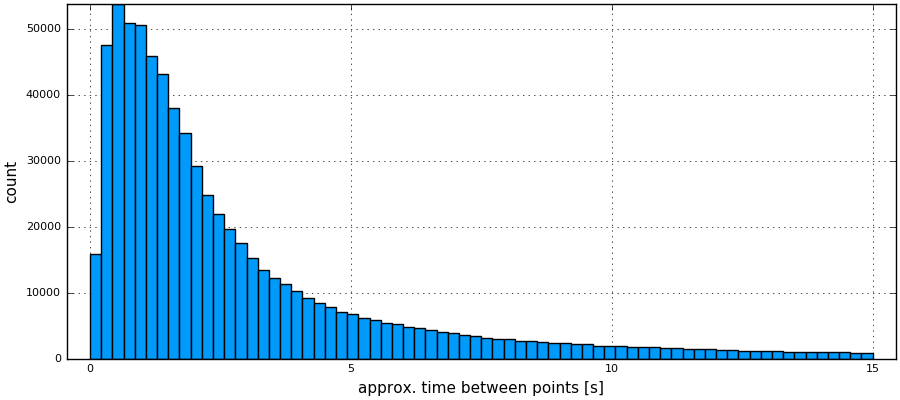

In [14]:
counter = 0
separation_times = []
for path_data in anon_paths
    mean_trip_velocity = path_data["distance_m"] / path_data["duration_s"] # meters/second
    for i = 1:length(path_data["utm"])-1
        counter += 1
        t = separation_distances[counter] / mean_trip_velocity # seconds
        push!(separation_times, t)
    end
end
histogram(filter(x->x < 15, separation_times), nbins=70, xlabel="approx. time between points [s]", ylabel="count", size=(900,400), leg=false)


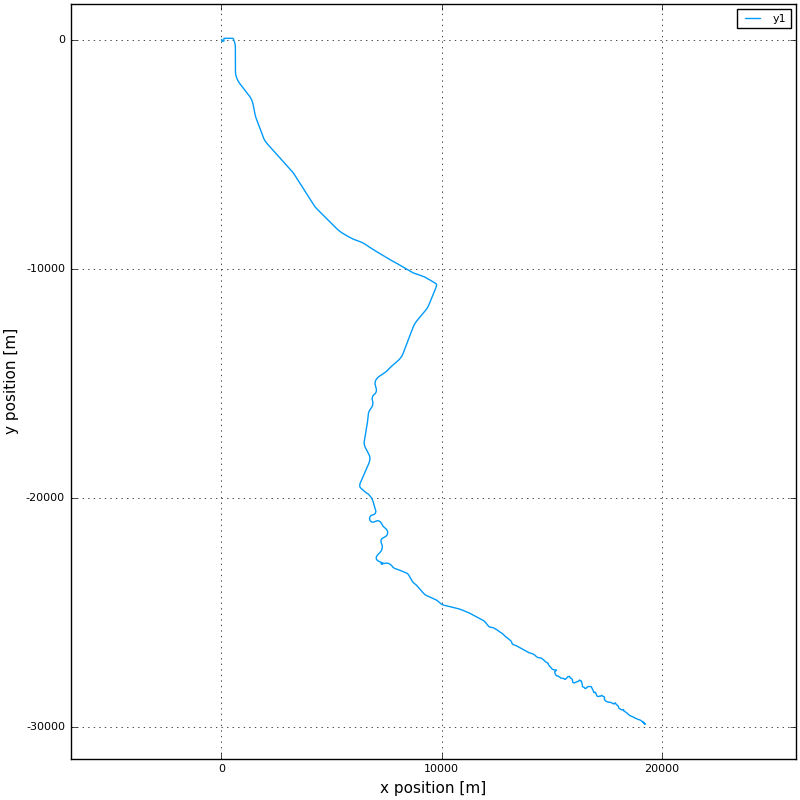

In [15]:
plot_drive(3)